<a href="https://colab.research.google.com/github/gulssumm/first_ML_project/blob/main/ML_Gulsum_Cetinozlu_Supervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'books-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4200521%2F7250132%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240919%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240919T121902Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D4484d9488cbe362e5cf62cc26030e5d0feefc61090506fc3328dcf1427b2a2851d39644cfe87b1adf5623b32fbf5327271aaacc708412d3378a4353f23531704e19a780f6f975c148343437ee9e656d95ed8825df359ad1511f3296f74cdbe43fca12bf96c9681f41254b3bfaa435a6a77fefe07ef9dc1f0243e91474c909aaa619bed45b50a102c8b7081ecb206356f9f2912f10db5ffaec6f660a3ec61a1f20495cda005c5a04f17600065f88c0c2c123d1e5cf69306ef524f3896f084347a18e4b51d7bf4a95833d247e43162c2e3ec9a65fc2ebc6944f0220b2fbb7dcb91aaa86332239e846bbbcdca5dd5d201c8146b4dd5d9489ef8c96f4e6582977401'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 55469565 bytes downloaded
Downloaded and uncompressed: books-dataset
Data source import complete.


In [46]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/books-dataset/BooksDatasetClean.csv
/kaggle/input/books-dataset/BooksDataset.csv


In [47]:
import seaborn as sns
from matplotlib import pyplot as plt

In [48]:
data = pd.read_csv("/kaggle/input/books-dataset/BooksDataset.csv")
data.head()

,Title,Authors,Description,Category,Publisher,Publish Date,Price
0,Goat Brothers,"By Colton, Larry",NaN,"History , General",Doubleday,"Friday, January 1, 1993",Price Starting at $8.79
1,The Missing Person,"By Grumbach, Doris",NaN,"Fiction , General",Putnam Pub Group,"Sunday, March 1, 1981",Price Starting at $4.99
2,Don't Eat Your Heart Out Cookbook,"By Piscatella, Joseph C.",NaN,"Cooking , Reference",Workman Pub Co,"Thursday, September 1, 1983",Price Starting at $4.99
3,When Your Corporate Umbrella Begins to Leak: A...,"By Davis, Paul D.",NaN,NaN,Natl Pr Books,"Monday, April 1, 1991",Price Starting at $4.99
4,Amy Spangler's Breastfeeding : A Parent's Guide,"By Spangler, Amy",NaN,NaN,Amy Spangler,"Saturday, February 1, 1997",Price Starting at $5.32


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103082 entries, 0 to 103081
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Title         103082 non-null  object
 1   Authors       103082 non-null  object
 2   Description   70213 non-null   object
 3   Category      76912 non-null   object
 4   Publisher     103074 non-null  object
 5   Publish Date  103082 non-null  object
 6   Price         103082 non-null  object
dtypes: object(7)
memory usage: 5.5+ MB


# Find NaN Values and Fill

In [50]:
data.isnull().sum()

,0
Title,0
Authors,0
Description,32869
Category,26170
Publisher,8
Publish Date,0
Price,0


In [51]:
# Fill missing 'Description', 'Category', and 'Publisher' with 'Unknown'
data['Description'].fillna('Unknown', inplace=True)
data['Category'].fillna('Unknown', inplace=True)
data['Publisher'].fillna('Unknown', inplace=True)

In [52]:
data.isnull().sum()

,0
Title,0
Authors,0
Description,0
Category,0
Publisher,0
Publish Date,0
Price,0


In [53]:
data.head()

,Title,Authors,Description,Category,Publisher,Publish Date,Price
0,Goat Brothers,"By Colton, Larry",Unknown,"History , General",Doubleday,"Friday, January 1, 1993",Price Starting at $8.79
1,The Missing Person,"By Grumbach, Doris",Unknown,"Fiction , General",Putnam Pub Group,"Sunday, March 1, 1981",Price Starting at $4.99
2,Don't Eat Your Heart Out Cookbook,"By Piscatella, Joseph C.",Unknown,"Cooking , Reference",Workman Pub Co,"Thursday, September 1, 1983",Price Starting at $4.99
3,When Your Corporate Umbrella Begins to Leak: A...,"By Davis, Paul D.",Unknown,Unknown,Natl Pr Books,"Monday, April 1, 1991",Price Starting at $4.99
4,Amy Spangler's Breastfeeding : A Parent's Guide,"By Spangler, Amy",Unknown,Unknown,Amy Spangler,"Saturday, February 1, 1997",Price Starting at $5.32


# Convert categorical data into numerical form

In [54]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
label_encoders = {}
for column in ['Authors', 'Category', 'Publisher']:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [55]:
# Extract numeric part of Price (assuming 'Price Starting at $5.29' format)
data['Price'] = data['Price'].str.extract(r'(\d+\.\d+)').astype(float)

# Data Visualization

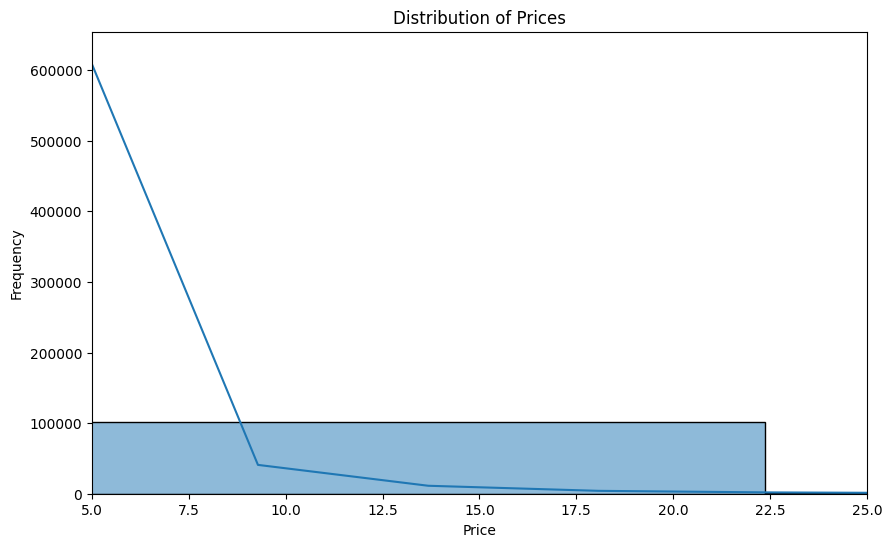

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], bins=50, kde=True)

# Prices between 0 and 50
plt.xlim(5, 25)

plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

* This is a right-skewed distribution which means that a large number of books have a relatively low price while only a small number of books have a much higher price

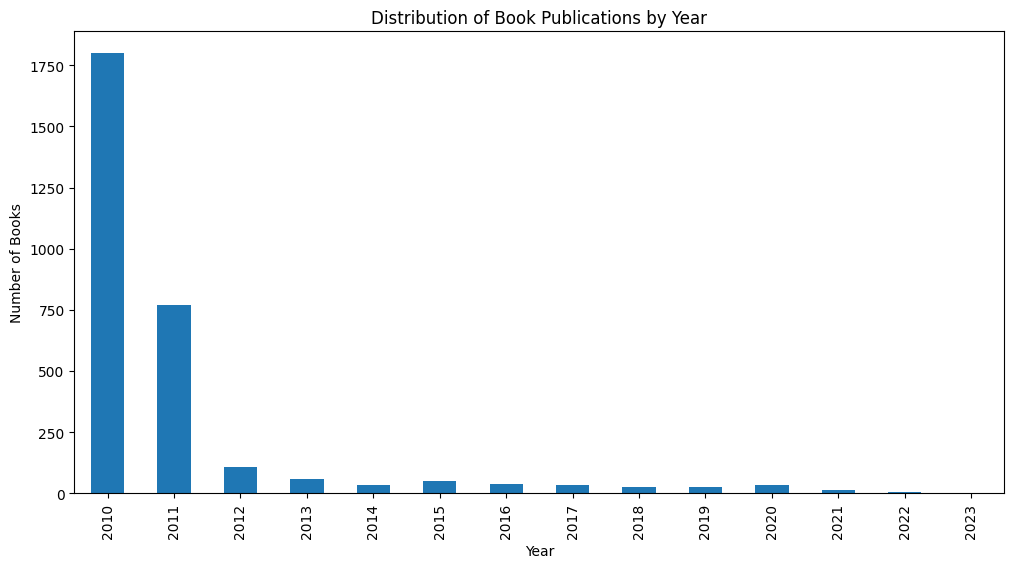

In [ ]:
# Convert 'Publish Date' to datetime
data['Publish Date'] = pd.to_datetime(data['Publish Date'], errors='coerce')

# Filter data to include only the years 2010-2024
filtered_data = data[data['Publish Date'].dt.year.between(2010, 2024)]

# Plot the distribution of 'Publish Date'
plt.figure(figsize=(12, 6))
filtered_data['Publish Date'].dropna().dt.year.value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Book Publications by Year')
plt.xlabel('Year')
plt.ylabel('Number of Books')
plt.show()

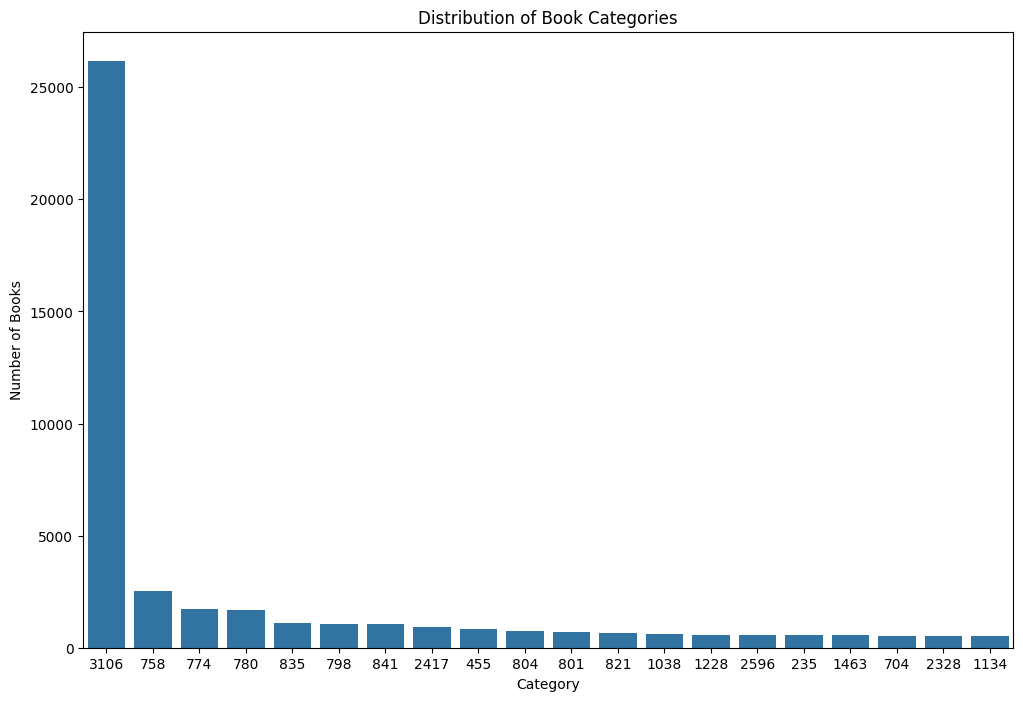

In [ ]:
# Plot the distribution of book genres
plt.figure(figsize=(12, 8))

# Filter to show only the top 20 categories
top_categories = data['Category'].value_counts().nlargest(20).index

sns.countplot(data=data, x='Category', order=top_categories)
plt.title('Distribution of Book Categories')
plt.xlabel('Category')
plt.ylabel('Number of Books')
plt.show()

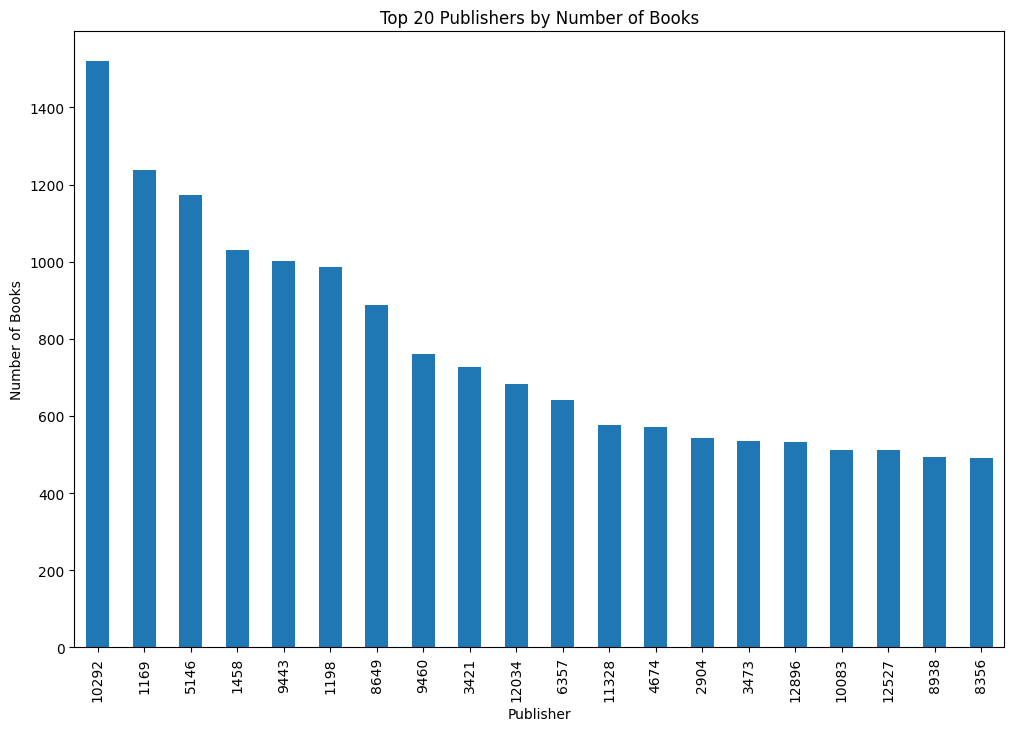

In [ ]:
# Plot the distribution of book publishers
plt.figure(figsize=(12, 8))
data['Publisher'].value_counts().head(20).plot(kind='bar')
plt.title('Top 20 Publishers by Number of Books')
plt.xlabel('Publisher')
plt.ylabel('Number of Books')
plt.xticks(rotation=90)
plt.show()

# Data Preparation for Learning

In [56]:
from sklearn.model_selection import train_test_split

# Features and target variables
X = data[['Authors', 'Category', 'Publisher']]  # We use to make predictions based on these
y = data['Price']                               # We want to predict prices

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Supervised Learning Algorithms

## Linear Regression

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 71.27936872907667
R² Score: 0.004169417101696715


* R² score is too low

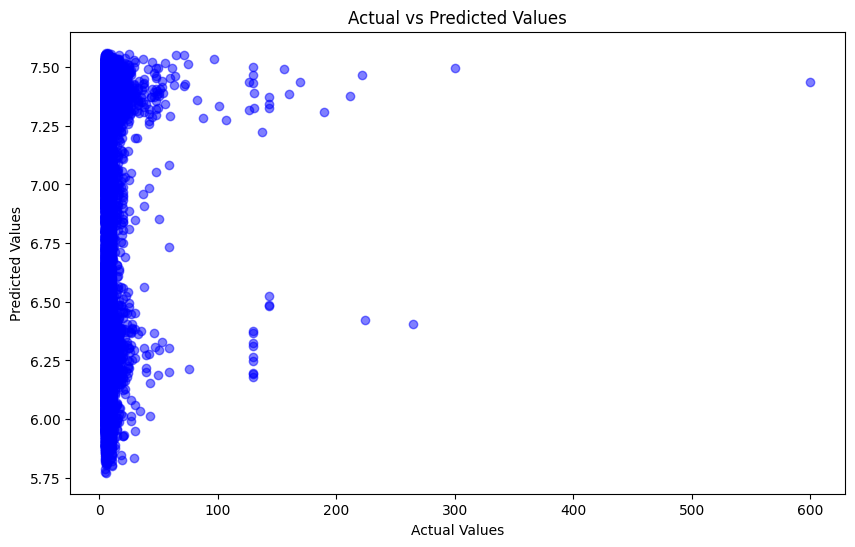

In [72]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

## Logistic Regression

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(conf_matrix)

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

* Because of Price is a continuous variable, I couldn't use logistic regression model.

## KNN(k-Nearest Neighbors)

In [81]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the KNN Regressor
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions
y_pred = knn_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 83.07464180084395
R² Score: -0.1606201127151008


* To find the optimal number of neighbors, I use cross-validation

In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
param_grid = {
    'n_neighbors': list(range(1, 21))
}
# Initialize the KNN Regressor
knn = KNeighborsRegressor()

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error',
                           n_jobs=-1, verbose=1)
# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Best model
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'n_neighbors': 20}
Mean Squared Error: 74.13903141925353
R² Score: -0.035782389633225886


* MSE: 74.13 indicates the average squared difference between the actual and predicted values.
* R² Score: -0.036 is below 0, which suggests that the model is performing worse than a simple mean-based model. It indicates that the model may not be capturing the underlying patterns in the data effectively.

## Decision Trees

In [83]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 124.62641082521954
R² Score: -0.741132021080533


* Decision trees algorithm is not useful for this dataset

#### Feature Importances

In [85]:
# Get feature importances
importances = dt_model.feature_importances_

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importances)

     Feature  Importance
0    Authors    0.568276
2  Publisher    0.358278
1   Category    0.073446


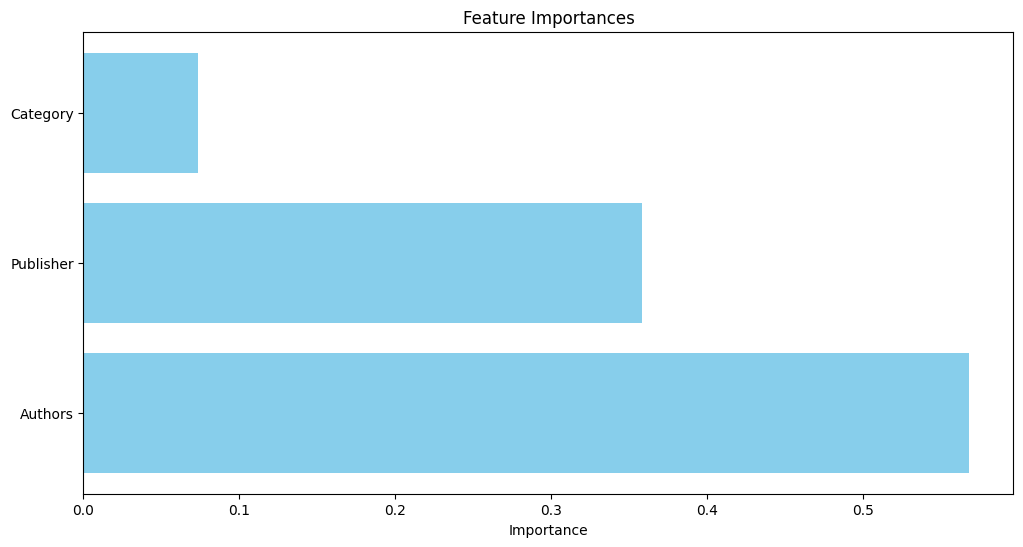

In [86]:
import matplotlib.pyplot as plt

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

## Random Forest Regressor

In [87]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 73.82523195193949
R² Score: -0.0313983566090803


# Deductions
* Linear Regression has a lower MSE value and a lower R² Score compared to the other models
* To improve I will add new features

# Improvement

In [57]:
data.columns

Index(['Title', 'Authors', 'Description', 'Category', 'Publisher',
       'Publish Date', 'Price'],
      dtype='object')

In [58]:
# Convert 'Publish Date' to datetime
data['Publish Date'] = pd.to_datetime(data['Publish Date'], errors='coerce')

data['Publish Year'] = data['Publish Date'].dt.year
data['Publish Month'] = data['Publish Date'].dt.month
data['Publish Day'] = data['Publish Date'].dt.day
data['Description Length'] = data['Description'].str.len()

In [59]:
data.columns

Index(['Title', 'Authors', 'Description', 'Category', 'Publisher',
       'Publish Date', 'Price', 'Publish Year', 'Publish Month', 'Publish Day',
       'Description Length'],
      dtype='object')

In [62]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
label_encoders = {}
for column in ['Title', 'Authors', 'Description', 'Category', 'Publisher',
        'Publish Year', 'Publish Month', 'Publish Day',
       'Description Length']:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Drop original 'Publish Date'
# data.drop(columns=['Publish Date'], inplace=True)

# Split data into features and target
X = data[['Title', 'Authors', 'Description', 'Category', 'Publisher',
        'Publish Year', 'Publish Month', 'Publish Day',
       'Description Length']]
y = data['Price']

# Proceed with model training
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict using the test set
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print(f"Mean Squared Error (Linear Regression): {mse}")
print(f"R² Score (Linear Regression): {r2}")

Mean Squared Error (Linear Regression): 68.32191305992136
R² Score (Linear Regression): 0.04548747105507622


In [63]:
data.isnull().sum()

,0
Title,0
Authors,0
Description,0
Category,0
Publisher,0
Price,0
Publish Year,0
Publish Month,0
Publish Day,0
Description Length,0


### In conclusion, the best model is linear regression and I improved it by adding more features. Last MSE is 68.32 and R² Score is 0.04